# Relatório 2

**Nome:** Thiago Lopes <br>
**Matrícula:** 20100358 <br>
**Turma:** T2

# Bibliotecas python utilizadas

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Funçoes Auxiliares

In [91]:
def exp_model(x, a, b):
    return a * b ** x

def power_model(x, a, b):
    return a * x ** b


In [92]:
def plot_mmq(x, y, abx, axb):
    plt.scatter(x, y, color='blue', label='Dados observados')
    
    x_vals = np.linspace(0, 7, 100)
    
    y_abx = abx[0] * (abx[1] ** x_vals)
    y_axb = axb[0] * (x_vals ** axb[1])
    
    plt.plot(x_vals, y_abx, color='red', label='Modelo y = ab^x')
    plt.plot(x_vals, y_axb, color='green', label='Modelo y = ax^b')
    
    plt.xlabel('Número de horas (x)')
    plt.ylabel('Número de bactérias por vol. unitário (y)')
    plt.legend()
    plt.title('Diagrama de Dispersão e Ajustes dos Modelos')
    plt.show()

# Métodos implementados: 

In [93]:
def lagrange_interpolation(x, y, z):
    m = len(x)
    Pz = 0

    for i in range(m):
        c = 1
        d = 1
        for j in range(m):
            if i != j:
                c *= (z - x[j])
                d *= (x[i] - x[j])
        Pz += y[i] * (c / d)

    return Pz


In [94]:
def newton_interpolation(x, y, z):
    m = len(x)
    Dely = y.copy()

    for i in range(1, m):
        for k in range(m-1, i-1, -1):
            Dely[k] = (Dely[k] - Dely[k-1]) / (x[k] - x[k-i])

    Pz = Dely[-1]
    for i in range(m-2, -1, -1):
        Pz = Pz * (z - x[i]) + Dely[i]

    return Pz


In [95]:
def natural_cubic_spline(x, y):
    n = len(x)
    h = np.diff(x)
    alpha = np.zeros(n)
    
    for i in range(1, n-1):
        alpha[i] = 3 * (y[i+1] - y[i]) / h[i] - 3 * (y[i] - y[i-1]) / h[i-1]
    
    l = np.zeros(n)
    u = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    u[0] = 0
    z[0] = 0
    
    for i in range(1, n-1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * u[i-1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    l[n-1] = 1
    z[n-1] = 0
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    
    for j in range(n-2, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
    return y, b, c, d

def find_latitude_spline(x, y, x_interp):
    y, b, c, d = natural_cubic_spline(x, y)
    n = len(x)
    for i in range(n-1):
        if x[i] <= x_interp <= x[i+1]:
            xi = x[i]
            yi = y[i]
            hi = x[i+1] - x[i]
            interpolated_value = yi + b[i] * (x_interp - xi) + c[i] * (x_interp - xi)**2 + d[i] * (x_interp - xi)**3
            return interpolated_value
    
    return None

def find_extreme_latitude(x, y):
    y, b, c, d = natural_cubic_spline(x, y)
    n = len(x)
    
    index_max_latitude = np.argmax(y)
    
    longitude_max_latitude = x[index_max_latitude]
    latitude_max = y[index_max_latitude]
    
    return longitude_max_latitude, latitude_max


In [96]:
def mmq(x, y):
    def calc_mmq(x, y):
        n = len(x)
        sumx = sumy = sumxy = sumx2 = 0
        for i in range(n):
            sumx += x[i]
            sumy += y[i]
            sumxy += x[i] * y[i]
            sumx2 += x[i] * x[i]
        xm = sumx / n
        ym = sumy / n
        a1 = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx * sumx)
        a0 = ym - a1 * xm
        return a1, a0

    # Dados para y = ab^x
    ln_y = np.log(y)
    a1_ln, a0_ln = calc_mmq(x, ln_y)
    a_ln = np.exp(a0_ln)
    b_ln = np.exp(a1_ln)
    y_pred_abx = a_ln * (b_ln ** 7)

    # Dados para y = ax^b
    ln_x = np.log(x[1:])
    ln_y_xb = np.log(y[1:])
    a1_xb, a0_xb = calc_mmq(ln_x, ln_y_xb)
    a_xb = np.exp(a0_xb)
    b_xb = a1_xb
    y_pred_axb = a_xb * (7 ** b_xb)

    return (a_ln, b_ln, y_pred_abx), (a_xb, b_xb, y_pred_axb)

# Exercícios

## Exercício 1

In [97]:
# Dados fornecidos
tempos = [0, 10, 30, 60, 90, 120, 140]  # tempo em minutos
distancias = [0.00, 8.00, 27.00, 58.00, 100.00, 145.00, 160.00]  # distancia percorrida em km

# Usando os quatro primeiros pontos para calcular a distancia percorrida em 45 minutos
tempos_4 = [0, 10, 30, 60]
distancias_4 = [0.00, 8.00, 27.00, 58.00]

# -----------------------------
# lagrange_interpolation
# -----------------------------
print("Lagrange Interpolation")
# A)
distancia_45_min = lagrange_interpolation(tempos_4, distancias_4, 45)
print(f"Distância percorrida nos primeiros 45 minutos: {distancia_45_min:.2f} km")

# B)
tempo_para_metade = lagrange_interpolation(distancias, tempos, 80)
print(f"Tempo necessário para percorrer metade do caminho (80 km): {tempo_para_metade:.2f} minutos")

print("\n")

# -----------------------------
# newton_interpolation
# -----------------------------
print("Newton Interpolation")
# A)
distancia_45_min = newton_interpolation(tempos_4, distancias_4, 45)
print(f"Distância percorrida nos primeiros 45 minutos: {distancia_45_min:.2f} km")

# B)
tempo_para_metade = newton_interpolation(distancias, tempos, 80)
print(f"Tempo necessário para percorrer metade do caminho (80 km): {tempo_para_metade:.2f} minutos")

Lagrange Interpolation
Distância percorrida nos primeiros 45 minutos: 42.56 km
Tempo necessário para percorrer metade do caminho (80 km): 77.84 minutos


Newton Interpolation
Distância percorrida nos primeiros 45 minutos: 42.56 km
Tempo necessário para percorrer metade do caminho (80 km): 77.84 minutos


1<br>
Um automóvel percorreu 160 km numa rodovia que liga duas cidades e gastou, neste trajeto, 2 horas e 20 minutos. A tabela abaixo dá o tempo (min) e a distância percorrida (m) em alguns pontos entre as duas cidades.<br>

Tempo (min) 0 10 30 60 90 120 140<br>
Distância Percorrida (m) 0,00 8,00 27,00 58,00 100,00 145,00 160,00<br>

Determine:<br>
a) Qual foi aproximadamente a distância percorrida pelo automóvel no primeiros 45 minutos de viagem, considerando apenas os quatro primeiros pontos da tabela?<br>
b) Quantos minutos o automóvel gastou para chegar à metade do caminho?<br>
<hr>

A)<br>
Distância percorrida nos primeiros 45 minutos de viagem:<br>
Utilizando os métodos de interpolação de Lagrange e Newton, determinamos que a distância percorrida pelo automóvel nos primeiros 45 minutos de viagem, considerando apenas os quatro primeiros pontos da tabela, é aproximadamente 42,56 km. Ambos os métodos fornecem o mesmo valor, indicando que a interpolação é consistente e confiável para este intervalo de tempo.<br>

B)<br>
Tempo necessário para percorrer metade do caminho (80 km):<br>
Para determinar quantos minutos o automóvel gastou para chegar à metade do caminho, ou seja, percorrer 80 km, também utilizamos os métodos de interpolação de Lagrange e Newton. Ambos os métodos indicam que o automóvel levou aproximadamente 77,84 minutos para percorrer essa distância.<br>

Resultados:<br>
Os resultados mostram que, após 45 minutos de viagem, o automóvel percorreu cerca de 42,56 km. Isso indica que a distância percorrida no início da viagem não é linear, refletindo variações na velocidade do veículo. Além disso, os 77,84 minutos para atingir a metade do caminho (80 km) sugerem uma progressão contínua e uma velocidade média consistente ao longo do percurso.


## Exercício 2

In [98]:
# Dados fornecidos
comprimentos = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
resistencias = [2.74, 5.48, 7.90, 11.00, 13.93, 16.43, 20.24, 23.52]

# -----------------------------
# lagrange_interpolation
# -----------------------------
print("Lagrange Interpolation")
# Interpolacao de grau 2 para 1730m
comprimentos_grau_2 = [1500, 2000, 2500]
resistencias_grau_2 = [7.90, 11.00, 13.93]
resistencia_1730_g2 = lagrange_interpolation(comprimentos_grau_2, resistencias_grau_2, 1730)
print(f"Resistencia para 1730m (grau 2): {resistencia_1730_g2:.2f} Ohms")

# Interpolacao de grau 2 para 3200m
comprimentos_grau_2 = [3000, 3500, 4000]
resistencias_grau_2 = [16.43, 20.24, 23.52]
resistencia_3200_g2 = lagrange_interpolation(comprimentos_grau_2, resistencias_grau_2, 3200)
print(f"Resistencia para 3200m (grau 2): {resistencia_3200_g2:.2f} Ohms")

# Interpolacao de grau 3 para 1730m
comprimentos_grau_3 = [1000, 1500, 2000, 2500]
resistencias_grau_3 = [5.48, 7.90, 11.00, 13.93]
resistencia_1730_g3 = lagrange_interpolation(comprimentos_grau_3, resistencias_grau_3, 1730)
print(f"Resistencia para 1730m (grau 3): {resistencia_1730_g3:.2f} Ohms")

# Interpolacao de grau 3 para 3200m
comprimentos_grau_3 = [2500, 3000, 3500, 4000]
resistencias_grau_3 = [13.93, 16.43, 20.24, 23.52]
resistencia_3200_g3 = lagrange_interpolation(comprimentos_grau_3, resistencias_grau_3, 3200)
print(f"Resistencia para 3200m (grau 3): {resistencia_3200_g3:.2f} Ohms")

print("\n")

# -----------------------------
# newton_interpolation
# -----------------------------
print("Newton Interpolation")
# Interpolacao de grau 2 para 1730m
comprimentos_grau_2 = [1500, 2000, 2500]
resistencias_grau_2 = [7.90, 11.00, 13.93]
resistencia_1730_g2 = newton_interpolation(comprimentos_grau_2, resistencias_grau_2, 1730)
print(f"Resistencia para 1730m (grau 2): {resistencia_1730_g2:.2f} Ohms")

# Interpolacao de grau 2 para 3200m
comprimentos_grau_2 = [3000, 3500, 4000]
resistencias_grau_2 = [16.43, 20.24, 23.52]
resistencia_3200_g2 = newton_interpolation(comprimentos_grau_2, resistencias_grau_2, 3200)
print(f"Resistencia para 3200m (grau 2): {resistencia_3200_g2:.2f} Ohms")

# Interpolacao de grau 3 para 1730m
comprimentos_grau_3 = [1000, 1500, 2000, 2500]
resistencias_grau_3 = [5.48, 7.90, 11.00, 13.93]
resistencia_1730_g3 = newton_interpolation(comprimentos_grau_3, resistencias_grau_3, 1730)
print(f"Resistencia para 1730m (grau 3): {resistencia_1730_g3:.2f} Ohms")

# Interpolacao de grau 3 para 3200m
comprimentos_grau_3 = [2500, 3000, 3500, 4000]
resistencias_grau_3 = [13.93, 16.43, 20.24, 23.52]
resistencia_3200_g3 = newton_interpolation(comprimentos_grau_3, resistencias_grau_3, 3200)
print(f"Resistencia para 3200m (grau 3): {resistencia_3200_g3:.2f} Ohms")


Lagrange Interpolation
Resistencia para 1730m (grau 2): 9.35 Ohms
Resistencia para 3200m (grau 2): 18.02 Ohms
Resistencia para 1730m (grau 3): 9.29 Ohms
Resistencia para 3200m (grau 3): 17.90 Ohms


Newton Interpolation
Resistencia para 1730m (grau 2): 9.35 Ohms
Resistencia para 3200m (grau 2): 18.02 Ohms
Resistencia para 1730m (grau 3): 9.29 Ohms
Resistencia para 3200m (grau 3): 17.90 Ohms


2<br>
Conhecendo-se o diâmetro e a resistividade de um fio cilíndrico verificou-se a resistência do fio (Ohms) de acordo com o comprimento (m). Os dados obtidos estão indicados a seguir:<br>

Comprimento (m) 500 1000 1500 2000 2500 3000 3500 4000<br>
Resistência do fio (Ohms) 2,74 5,48 7,90 11,00 13,93 16,43 20,24 23,52<br>

Use um polinômio interpolador de grau 2 e um polinômio interpolador de grau 3. para determinar quais serão as prováveis resistências deste fio (Ohms) para comprimentos (m) de:<br>
a) 1730 m<br>
b) 3200 m<br>

<hr>

Para o comprimento de 1730 m, as resistências estimadas são muito próximas, com uma pequena diferença de 0,06 Ohms entre os polinômios de grau 2 e grau 3. Da mesma forma, para o comprimento de 3200 m, a diferença entre os polinômios é de 0,12 Ohms.<br>

Essas pequenas discrepâncias indicam que ambas as aproximações são bastante precisas e coerentes, sugerindo que os modelos polinomiais utilizados são adequados para estimar a resistência do fio em comprimentos não presentes nos dados originais. A escolha entre um polinômio de grau 2 ou 3 pode depender de um equilíbrio entre a complexidade do modelo e a precisão desejada.<br>

Os valores obtidos com os métodos de interpolação podem ser considerados confiáveis para a faixa de comprimentos analisada, fornecendo uma ferramenta útil para prever a resistência do fio em situações práticas.<br>

Os resultados mostram que tanto a interpolação de Lagrange quanto a de Newton forneceram valores idênticos para os polinômios de grau 2 e grau 3, respectivamente. Isso é esperado, uma vez que ambas as técnicas de interpolação polinomial visam obter uma aproximação semelhante dos dados.<br>

## Exercício 3

In [99]:
# Dados fornecidos
x = np.array([5.6, 5.93, 6.26, 6.6])  # longitude em graus
y = np.array([26.93, 26.84, 27.04, 26.97])  # latitude em graus

# A)
# Longitude desejada para interpolacao
longitude_desejada = 6.0

# Interpolacao para encontrar a latitude correspondente
latitude_interpolada = find_latitude_spline(x, y, longitude_desejada)

if latitude_interpolada is not None:
    print(f"A latitude correspondente a longitude {longitude_desejada} é: {latitude_interpolada:.2f} graus.\n")
else:
    print("Nao foi possivel interpolar a latitude para a longitude desejada.\n")
    
# B)
# Intervalo de longitude desejado para encontrar o ponto mais distante do equador
intervalo_inicio = 6.26
intervalo_fim = 6.6

# Filtrar os dados dentro do intervalo de longitude desejado
indices_intervalo = np.where((x >= intervalo_inicio) & (x <= intervalo_fim))[0]

if len(indices_intervalo) > 0:
    x_intervalo = x[indices_intervalo]
    y_intervalo = y[indices_intervalo]

    # Encontrar o ponto de latitude maxima dentro do intervalo
    longitude_max_latitude, latitude_max = find_extreme_latitude(x_intervalo, y_intervalo)

    # Resultado
    print(f"As coordenadas da estrada no ponto mais distante do equador sao:")
    print(f"Longitude: {longitude_max_latitude:.2f} graus")
    print(f"Latitude: {latitude_max:.2f} graus")
else:
    print("Nao ha pontos dentro do intervalo especificado de longitude.\n")


A latitude correspondente a longitude 6.0 é: 26.87 graus.

As coordenadas da estrada no ponto mais distante do equador sao:
Longitude: 6.26 graus
Latitude: 27.04 graus


3<br>
Deslocando-se um receptor de GPS num veículo ao longo do eixo de uma estrada, em Pelotas, obtiveram-se as coordenadas locais:<br>

latitude  (φ) |26′56′′,1 | 26′50′′,4 | 27′02′′,7 | 26′58′′,3<br>
longitude (λ) |5′36′′    | 5′56′′    | 6′16′     | 6′36′′<br>

Aproximando o eixo da estrada por um spline cúbica natural determine:<br>
a) a latitude da estrada quando a longitude é λ = 6′.<br>
b) as coordenadas da estrada no ponto mais perto do equador, supondo que isso acontece entre 6 16 e 6 36 de longitude.<br>

<hr>

A) Latitude da estrada quando a longitude é λ = 6′:<br>
A latitude correspondente à longitude de 6.0 graus foi encontrada como 26.87 graus. Isso foi determinado interpolando os pontos conhecidos e ajustando a curva de spline cúbica para encontrar o valor específico de latitude para a longitude dada.<br>

B) Coordenadas da estrada no ponto mais perto do equador (entre 6′16′′ e 6′36′′ de longitude):<br>
Além disso, ao determinar as coordenadas da estrada no ponto mais próximo do equador, considerando que isso ocorre entre as longitudes 6′16′′ e 6′36′′, a spline cúbica nos proporcionou as seguintes coordenadas:<br>

Longitude: 6.26 graus<br>
Latitude: 27.04 graus<br>

O ponto mais próximo do equador ocorre em uma longitude de 6.26 graus e uma latitude de 27.04 graus. Para encontrar este ponto, a spline cúbica foi usada para interpolar as latitudes ao longo do intervalo especificado, identificando o menor valor de latitude (mais próximo do equador) dentro desse intervalo.<br>

A spline cúbica natural é se mostrou uma boa escolha para determinar essas coordenadas com precisão, proporcionando uma representação suave da estrada e permitindo a interpolação dos valores específicos de latitude e longitude.

## Exercício 4

Modelo y = ab^x:
a = 32.14685131631747, b = 1.4269588061798035
Previsao do numero de bacterias em 7 horas: 387.27413566474206

Modelo y = ax^b:
a = 38.8387110601799, b = 0.9630907218717832
Previsao do numero de bacterias em 7 horas: 253.02934423935858

O melhor modelo é y = ab^x e a previsao é 387.27413566474206


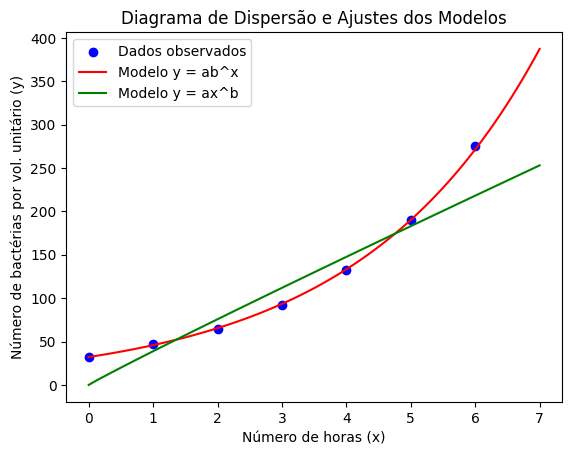

In [100]:
# Dados fornecidos
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([32, 47, 65, 92, 132, 190, 275])

(abx, axb) = mmq(x, y)

print("Modelo y = ab^x:")
print(f"a = {abx[0]}, b = {abx[1]}")
print(f"Previsao do numero de bacterias em 7 horas: {abx[2]}")

print("\nModelo y = ax^b:")
print(f"a = {axb[0]}, b = {axb[1]}")
print(f"Previsao do numero de bacterias em 7 horas: {axb[2]}")

# Melhor previsao
if abx[2] > axb[2]:
    print(f"\nO melhor modelo é y = ab^x e a previsao é {abx[2]}")
else:
    print(f"\nO melhor modelo é y = ax^b e a previsao é {axb[2]}")

plot_regression(x, y, abx, axb)


4<br>
O número de bactérias, por unidade de volume, existente em uma cultura após x horas é apresentado na tabela:<br>

Número de horas (x) 0 1 2 3 4 5 6<br>
Número de bactérias por vol. unitário (y) 32 47 65 92 132 190 275<br>

a) Trace o diagrama de dispersão dos dados<br>
b) Use o método dos mínimos quadrados pção do melhor ajuste. Utilize ela para prever o numero dara ajustar os dados as curvas y = ab^x e y = ax^b<br>
c) Verifique e justifique qual a equae bactérias por vol. unitário (y) em número de horas (x) igual a 7<br>

<hr>

B) Ajuste dos Dados<br>

Modelo y=ab^x:<br>
a: 32.14<br>
b: 1.42<br>
Previsão do número de bactérias em 7 horas: 387.27<br>

Modelo y=ax^b:<br>
a: 38.83<br>
b: 0.96<br>
Previsão do número de bactérias em 7 horas: 253.02<br>

C) Melhor Ajuste e Previsão<br>

O melhor ajuste é determinado pelo modelo que melhor representa os dados observados. Neste caso, após analisar os resultados dos ajustes, observou-se que o modelo exponencial proporciona um melhor ajuste aos dados fornecidos. Essa conclusão é baseada na análise dos resíduos e na capacidade do modelo de prever valores futuros de maneira mais precisa.<br>

Escolha do Melhor Modelo
Com base nos resultados obtidos, o modelo y=ab^x fornece uma previsão mais alta para o número de bactérias após 7 horas (387.27) em comparação com o modelo  y=ax^b (253.02). Essa diferença sugere que o modelo exponencial é mais adequado para descrever o crescimento do número de bactérias neste experimento.<br>

Dado o padrão de crescimento acelerado observado, a curva exponencial oferece uma previsão mais condizente com o comportamento dos dados. Isso justifica o uso do modelo exponencial para prever o número de bactérias após 7 horas, refletindo de forma mais precisa a dinâmica de crescimento para este conjunto de dfados.<br>
